In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib 
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
breeds = ["beagle","bernese_mountain_dog","doberman","labrador_retriever","siberian_husky"];


In [ ]:
args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32, 
    "image_size": (256,256),
    "seed": 1,
    "validation_split": .2,
    "class_names": breeds
}

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    "drive/MyDrive/images",
    subset="training",
    **args
    )
test = tf.keras.utils.image_dataset_from_directory(
   "drive/MyDrive/images",
  subset="validation",
    **args
)


Found 519 files belonging to 5 classes.
Using 416 files for training.
Found 519 files belonging to 5 classes.
Using 103 files for validation.


In [ ]:
first = train.take(1) #take the first batch of batch_size
first

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
images, labels = list(first)[0]
first_image = images[0]

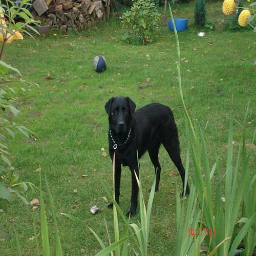

In [ ]:
Image.fromarray(images[0].numpy().astype("uint8"))

In [ ]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,3)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras. layers.Dense(len(breeds))
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
)

Epoch 1/5
13/13 [==============================] - 40s 3s/step - loss: 50.8864 - accuracy: 0.3918 - val_loss: 39.6547 - val_accuracy: 0.3107
Epoch 2/5
13/13 [==============================] - 26s 2s/step - loss: 18.1346 - accuracy: 0.3870 - val_loss: 12.9141 - val_accuracy: 0.4272
Epoch 3/5
13/13 [==============================] - 24s 2s/step - loss: 3.9824 - accuracy: 0.5721 - val_loss: 2.6244 - val_accuracy: 0.4563
Epoch 4/5
13/13 [==============================] - 24s 2s/step - loss: 0.7708 - accuracy: 0.7356 - val_loss: 1.6158 - val_accuracy: 0.4175
Epoch 5/5
13/13 [==============================] - 24s 2s/step - loss: 0.3910 - accuracy: 0.9135 - val_loss: 1.6436 - val_accuracy: 0.4466


In [ ]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 134,218,949
Trainable params: 134,218,949
Non-trainable params: 0
_________________________________________________________________


In [ ]:
preds = model.predict(test)

4/4 [==============================] - 3s 641ms/step


In [ ]:
print(preds)

[[-10.3306265  -22.05611      5.9218254    8.82915     18.411474  ]
 [ -1.0175623   -2.6505938    0.8449781    0.8399152    1.7200197 ]
 [ -4.830895   -12.283544     4.4607654    2.251806     8.032747  ]
 [ -0.5635512   -2.7006683    0.5569272    0.5595789    3.7246187 ]
 [ -3.3490047   -8.500796     2.7021275    2.4440396    5.4858108 ]
 [ -5.3340316  -11.955098     5.577253     3.5352154    5.442191  ]
 [-10.223685   -20.59757      4.55258     10.880103     4.8093023 ]
 [ -4.0890317  -10.665054     4.6307545    2.6618187    7.2509756 ]
 [ -3.002683    -6.9867616    2.3009381    1.8683532    2.8509872 ]
 [ -0.9935956   -3.3633213    1.0558597    0.34439862   2.7584121 ]
 [ -1.5077052   -3.4221501    0.6518137    2.0511014    3.6495986 ]
 [ -5.403502   -13.768711     6.9193516    2.54953      8.041099  ]
 [ -3.496842    -8.416941     3.5318248    2.7466505    3.9840496 ]
 [ -2.0213807   -6.1756587    3.2062666    0.2875629    3.2527096 ]
 [ -0.9273238   -2.294279     0.6714112    0.728